<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/IPL_SCORE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-by-Step Guide to IPL Score Prediction using Deep Learning
Step 1: First, let’s import all the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

Step 2: Loading the dataset!

In [2]:
ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Step 3: Data Pre-processing
 Dropping unimportant features

We have created a new dataframe by dropping several columns from the original DataFrame.
## **The new DataFrame contains the remaining columns that we are going to train the predictive model.**

In [3]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

Further Pre-Processing
We have split the data frame into independent variable (X) and dependent variables (y). Our dependent variables is the total score.

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']

Label Encoding

We have applied label encoding to your categorical features in X.
We have created separate LabelEncoder objects for each categorical feature and encoded their values.
We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [5]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

Train Test Split

We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.
X_train contains the training data for your input features.
X_test contains the testing data for your input features.
y_train contains the training data for your target variable.
y_test contains the testing data for your target variable.

In [6]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Scaling

We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
Scaling is performed to ensure consistent scale to improve model performance.
Scaling has transformed both training and testing data using the scaling parameters.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: Define the Neural Network
We have defined a neural network using TensorFlow and Keras for regression.
After defining the model, we have compiled the model using the Huber Loss because of the robustness of the regression against outliers.

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

Step 5: Model Training

We have trained the neural network model using the scaled training data.

In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 55.2647 - val_loss: 22.1392
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1973 - val_loss: 22.2245
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.1737 - val_loss: 21.9497
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 22.2490 - val_loss: 22.2586
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1807 - val_loss: 21.9287
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.1484 - val_loss: 21.9378
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.0989 - val_loss: 21.9166
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 22.2483 - val_loss: 21.8270
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 22.0818 - val_loss: 22.0485
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1055 - val_loss: 21.8334
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.1732 - val_loss: 21.7455
Epoch 12/50
832/832 ━━━━━━━━━━

After the training, we have stored the training and validation loss values to our neural network during the training process.

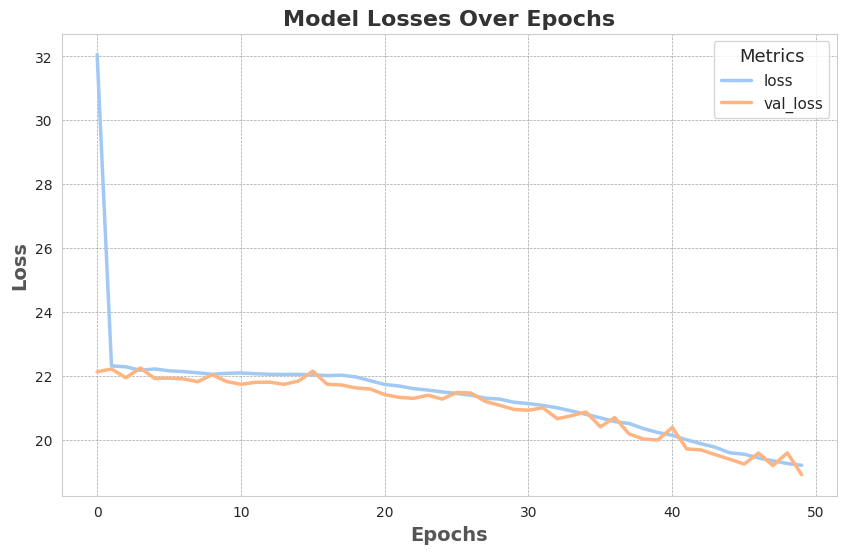

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample code for plotting model losses with advanced colors
model_losses = pd.DataFrame(model.history.history)

# Set a theme for the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")  # Choose a soft color palette for a polished look

# Create a line plot with customized colors and styles
plt.figure(figsize=(10, 6))
for column in model_losses.columns:
    sns.lineplot(data=model_losses[column], label=column, linewidth=2.5)

# Customize plot aesthetics
plt.title("Model Losses Over Epochs", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Epochs", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Loss", fontsize=14, fontweight='bold', color="#555555")
plt.legend(title="Metrics", title_fontsize='13', fontsize='11')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


Step 6: Model Evaluation

In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


19.408811020971363

Step 7: Let’s create an Interactive Widget

We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
Decodes the user-selected values to their original categorical values.
Encodes and scales these values to match the format used in model training.
Uses the trained model to make a prediction based on the user’s input.
Displays the predicted score.

In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [13]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [14]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create input widgets
venue = widgets.Dropdown(options=['Stadium A', 'Stadium B', 'Stadium C'], description="Venue:")
batting_team = widgets.Dropdown(options=['Team A', 'Team B'], description="Batting Team:")
bowling_team = widgets.Dropdown(options=['Team C', 'Team D'], description="Bowling Team:")
striker = widgets.Text(description="Striker:")
bowler = widgets.Text(description="Bowler:")
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

# Dummy data for plotting after prediction (modify this based on your data)
# For demonstration, we use random data
def create_prediction_plots():
    # Creating a sample DataFrame to mimic model results
    data = pd.DataFrame({
        'Over': range(1, 21),
        'Predicted Runs': np.random.randint(1, 10, 20),
        'Wickets': np.random.randint(0, 2, 20).cumsum()
    })

    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot predicted runs
    sns.lineplot(x='Over', y='Predicted Runs', data=data, ax=ax1, color='blue', label='Predicted Runs', linewidth=2.5)
    ax1.set_xlabel("Overs")
    ax1.set_ylabel("Predicted Runs", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Adding a secondary axis for wickets
    ax2 = ax1.twinx()
    sns.lineplot(x='Over', y='Wickets', data=data, ax=ax2, color='red', label='Wickets', linestyle='--', linewidth=2.5)
    ax2.set_ylabel("Wickets", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Add titles and legend
    plt.title("Predicted Runs and Wickets Over Time")
    fig.tight_layout()
    plt.show()

# Define the button click handler
def predict_score(change):
    with output:
        output.clear_output()  # Clear previous output
        # Call prediction model or any other logic here
        # Display the plots
        create_prediction_plots()

# Set up button click
predict_button.on_click(predict_score)

# Display the widgets and output
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Venue:', options=('Stadium A', 'Stadium B', 'Stadium C'), value='Stadium A')

Dropdown(description='Batting Team:', options=('Team A', 'Team B'), value='Team A')

Dropdown(description='Bowling Team:', options=('Team C', 'Team D'), value='Team C')

Text(value='', description='Striker:')

Text(value='', description='Bowler:')

Button(description='Predict Score', style=ButtonStyle())

Output()